In [ ]:
#Step 1 : Acquiring the dataset

"""
To acquire the dataset, we didn't use any predefined datasource, We instead used a
scraping algorithm that we have defined and uploaded in a repository. Using this
algorithm we scraped more than 100 images for each classes from online e-commerce website.
"""

"""
For the checkpoint submission, we have made use of 33 classes to test out the viability
of the datasets we have collected and setting up the pipeline for the given dataset and
testing the dataset on a ResNET architecture
"""

'\nFor the checkpoint submission, we have made use of 33 classes to test out the viability\nof the datasets we have collected and setting up the pipeline for the given dataset and\ntesting the dataset on a ResNET architecture\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd
!rm -r Dataset

/content
rm: cannot remove 'Dataset': No such file or directory


In [ ]:
!mkdir Dataset

In [ ]:
!unzip /content/drive/MyDrive/DL_Project/images_1500.zip -d /content/Dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/scraped-images/water-bottle/_320.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_321.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_322.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_323.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_324.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_325.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_326.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_327.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_328.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_329.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_33.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_330.png  
  inflating: /content/Dataset/scraped-images/water-bottle/_331.png  
  inflating: /content/Dataset/scraped-images/water-bo

In [ ]:
#Importing the required library

import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [ ]:
import os
import shutil

# Path to your dataset
dataset_path = '/content/Dataset/scraped-images'

# List of classes you want to keep
selected_classes = ['action-camera','bookshelf','blender','bottle','camping-tent','kitchen-knife-set','sunglasses','protein-powder','power-bank','plant-pot']

# List all directories in the dataset path
all_classes = os.listdir(dataset_path)

# Loop through the directories
for class_name in all_classes:
    class_path = os.path.join(dataset_path, class_name)
    if class_name not in selected_classes:
        # Remove directory if it's not in the selected_classes
        shutil.rmtree(class_path)
        print(f"Removed {class_path}")


Removed /content/Dataset/scraped-images/pet-bed
Removed /content/Dataset/scraped-images/sneakers
Removed /content/Dataset/scraped-images/running-shoes
Removed /content/Dataset/scraped-images/cheese-grater
Removed /content/Dataset/scraped-images/wine-glasses
Removed /content/Dataset/scraped-images/leggings
Removed /content/Dataset/scraped-images/smartphone
Removed /content/Dataset/scraped-images/electric-toothbrush
Removed /content/Dataset/scraped-images/aquarium-filter
Removed /content/Dataset/scraped-images/board-games
Removed /content/Dataset/scraped-images/throw-blanket
Removed /content/Dataset/scraped-images/wall-clock
Removed /content/Dataset/scraped-images/water-bottle
Removed /content/Dataset/scraped-images/spice-rack
Removed /content/Dataset/scraped-images/yoga-mat
Removed /content/Dataset/scraped-images/table-lamp
Removed /content/Dataset/scraped-images/espresso-machine
Removed /content/Dataset/scraped-images/hand-sanitizer
Removed /content/Dataset/scraped-images/watch
Removed

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root='/content/Dataset/scraped-images', transform=transform)

dataloader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

def compute_mean_std(dataloader):
    mean = torch.zeros(3)
    std = torch.zeros(3)
    total_images_count = 0

    for images, _ in dataloader:
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.var(2).sum(0)
        total_images_count += batch_samples

    mean /= total_images_count
    std = torch.sqrt(std / total_images_count)
    return mean, std

mean, std = compute_mean_std(dataloader)

print(f'Mean: {mean}')
print(f'Std: {std}')


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Mean: tensor([0.6253, 0.6092, 0.5856])
Std: tensor([0.2648, 0.2620, 0.2707])


In [ ]:
from torchvision import transforms

# Training transformations with data augmentation
train_transform = transforms.Compose([
    transforms.Resize(255),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


val_test_transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

from torchvision import datasets

dataset = datasets.ImageFolder(root='/content/Dataset/scraped-images', transform=train_transform)  # Apply augmentation only to the training set

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(0.7*len(dataset)), int(0.15*len(dataset)), len(dataset)-int(0.7*len(dataset))-int(0.15*len(dataset))])

val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

from torch.utils.data import DataLoader

BATCH_SIZE = 512
num_workers = 8

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)


In [ ]:
len(dataset.classes)

10

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

class ResNet_D(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet_D, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)

        return x

def resnet18_drop(num_classes):
    model = ResNet_D(ResidualBlock, [2, 2, 2, 2], num_classes=num_classes)
    return model

model = resnet18_drop(num_classes=len(dataset.classes))

In [ ]:
print(model)

ResNet_D(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=

In [ ]:
import torch
import torch.nn.functional as F

def train_model(net, train_loader, validation_loader, device, EPOCH_COUNT=1, wd=0):
    net.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=wd)

    train_losses, validation_losses = [], []
    train_accuracies, validation_accuracies = [], []

    for epoch in range(EPOCH_COUNT):
        net.train()
        running_loss, correct, total = 0.0, 0, 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Validation phase
        net.eval()
        validation_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for data in validation_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                validation_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        validation_losses.append(validation_loss / len(validation_loader))
        validation_accuracies.append(100 * correct / total)

        print(f"Epoch [{epoch+1}/{EPOCH_COUNT}], Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracies[-1]:.2f}%, Validation Loss: {validation_losses[-1]:.4f}, Validation Accuracy: {validation_accuracies[-1]:.2f}%")

    print('Finished Training')
    return train_losses, train_accuracies, validation_losses, validation_accuracies



In [ ]:
train_losses_d, train_accuracies_d, validation_losses_d, validation_accuracies_d = train_model(model, train_loader, val_loader, device, EPOCH_COUNT=150, wd=1e-4)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/150], Training Loss: 2.0987, Training Accuracy: 28.22%, Validation Loss: 5.4521, Validation Accuracy: 22.13%
Epoch [2/150], Training Loss: 1.6623, Training Accuracy: 43.82%, Validation Loss: 1.9138, Validation Accuracy: 38.46%
Epoch [3/150], Training Loss: 1.4227, Training Accuracy: 52.74%, Validation Loss: 1.7977, Validation Accuracy: 40.70%
Epoch [4/150], Training Loss: 1.2484, Training Accuracy: 58.54%, Validation Loss: 1.4178, Validation Accuracy: 53.73%
Epoch [5/150], Training Loss: 1.0853, Training Accuracy: 64.75%, Validation Loss: 1.7055, Validation Accuracy: 50.02%
Epoch [6/150], Training Loss: 0.9918, Training Accuracy: 67.54%, Validation Loss: 1.1068, Validation Accuracy: 62.38%
Epoch [7/150], Training Loss: 0.8752, Training Accuracy: 71.82%, Validation Loss: 1.1002, Validation Accuracy: 63.01%
Epoch [8/150], Training Loss: 0.7630, Training Accuracy: 75.26%, Validation Loss: 0.9823, Validation Accuracy: 67.87%
Epoch [9/150], Training Loss: 0.7322, Training Accuracy:

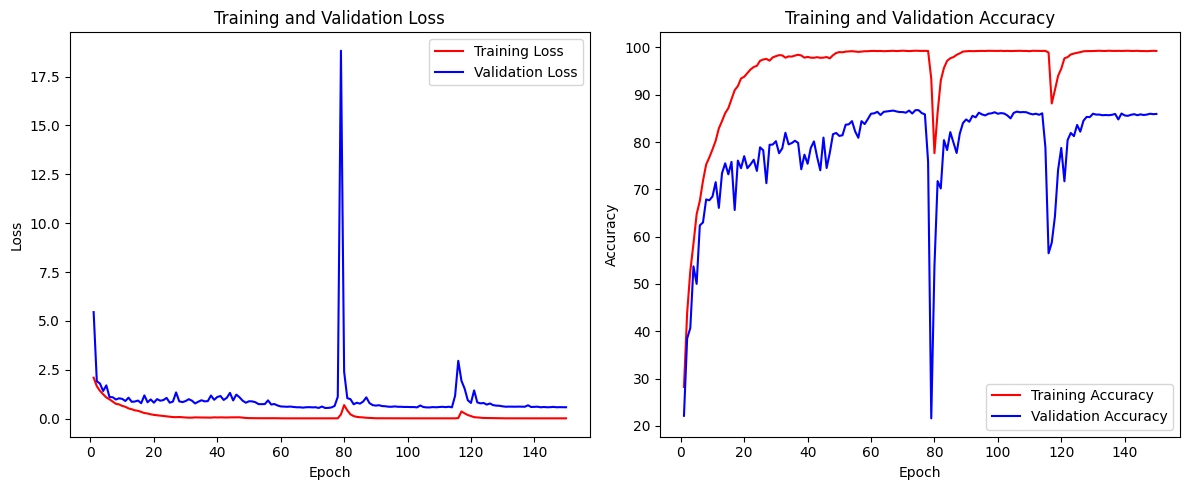

In [ ]:
plot_metrics(train_losses_d, train_accuracies_d, validation_losses_d, validation_accuracies_d)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def evaluate_model(net, device, test_loader):
    net.to(device)
    net.eval()

    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

    accuracy = accuracy_score(all_labels, all_predictions)

    return cm, precision, recall, f1, accuracy

In [ ]:
cm, precision, recall, f1, accuracy = evaluate_model(model, device, test_loader)

In [ ]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(20, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

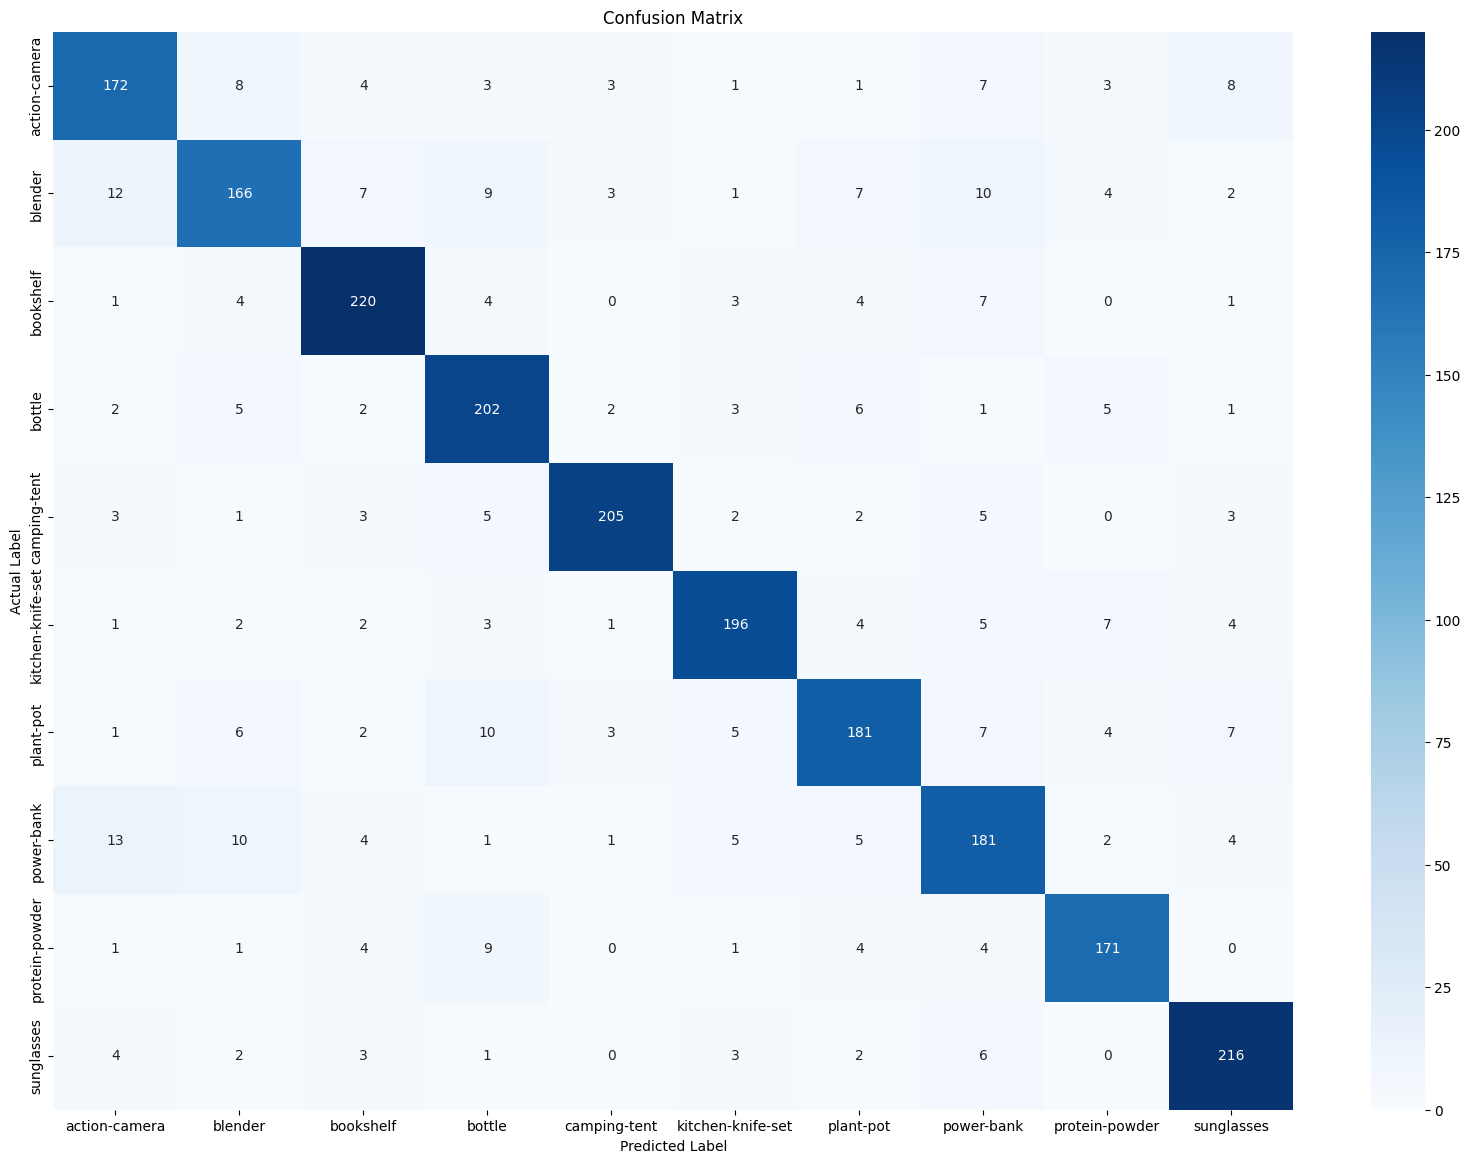

In [ ]:
class_names = dataset.classes
plot_confusion_matrix(cm, class_names)

In [ ]:
#Method to plot metrics
import matplotlib.pyplot as plt

def plot_metrics(train_losses, train_accuracies, validation_losses, validation_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'r-', label='Training Loss')
    plt.plot(epochs, validation_losses, 'b-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'r-', label='Training Accuracy')
    plt.plot(epochs, validation_accuracies, 'b-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Accuracy:{accuracy*100}")

Precision: 0.8524, Recall: 0.8519, F1 Score: 0.8517, Accuracy:85.19179304192686


In [ ]:
#Using Squeeze and Excitation block

class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ResidualBlock_SE(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None, reduction=16):
        super(ResidualBlock_SE, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.se = SEBlock(out_channels, reduction)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.se(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


In [ ]:
def senet18_drop(num_classes):
    model = ResNet_D(ResidualBlock_SE, [2, 2, 2, 2], num_classes=num_classes)
    return model

model2 = senet18_drop(num_classes=len(dataset.classes))
print(model2)

ResNet_D(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock_SE(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (se): SEBlock(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=False)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out

In [ ]:
train_losses_se, train_accuracies_se, validation_losses_se, validation_accuracies_se = train_model(model2, train_loader, val_loader, device, EPOCH_COUNT=150, wd=1e-4)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/150], Training Loss: 1.9377, Training Accuracy: 33.05%, Validation Loss: 2.2740, Validation Accuracy: 26.73%
Epoch [2/150], Training Loss: 1.4246, Training Accuracy: 53.43%, Validation Loss: 1.5736, Validation Accuracy: 47.21%
Epoch [3/150], Training Loss: 1.1741, Training Accuracy: 61.16%, Validation Loss: 1.5445, Validation Accuracy: 53.28%
Epoch [4/150], Training Loss: 1.0158, Training Accuracy: 66.78%, Validation Loss: 1.2674, Validation Accuracy: 60.51%
Epoch [5/150], Training Loss: 0.8811, Training Accuracy: 71.55%, Validation Loss: 1.1307, Validation Accuracy: 63.68%
Epoch [6/150], Training Loss: 0.7610, Training Accuracy: 75.36%, Validation Loss: 1.3784, Validation Accuracy: 60.73%
Epoch [7/150], Training Loss: 0.6808, Training Accuracy: 78.11%, Validation Loss: 0.9216, Validation Accuracy: 70.86%
Epoch [8/150], Training Loss: 0.6033, Training Accuracy: 80.34%, Validation Loss: 0.9879, Validation Accuracy: 70.28%
Epoch [9/150], Training Loss: 0.5194, Training Accuracy:

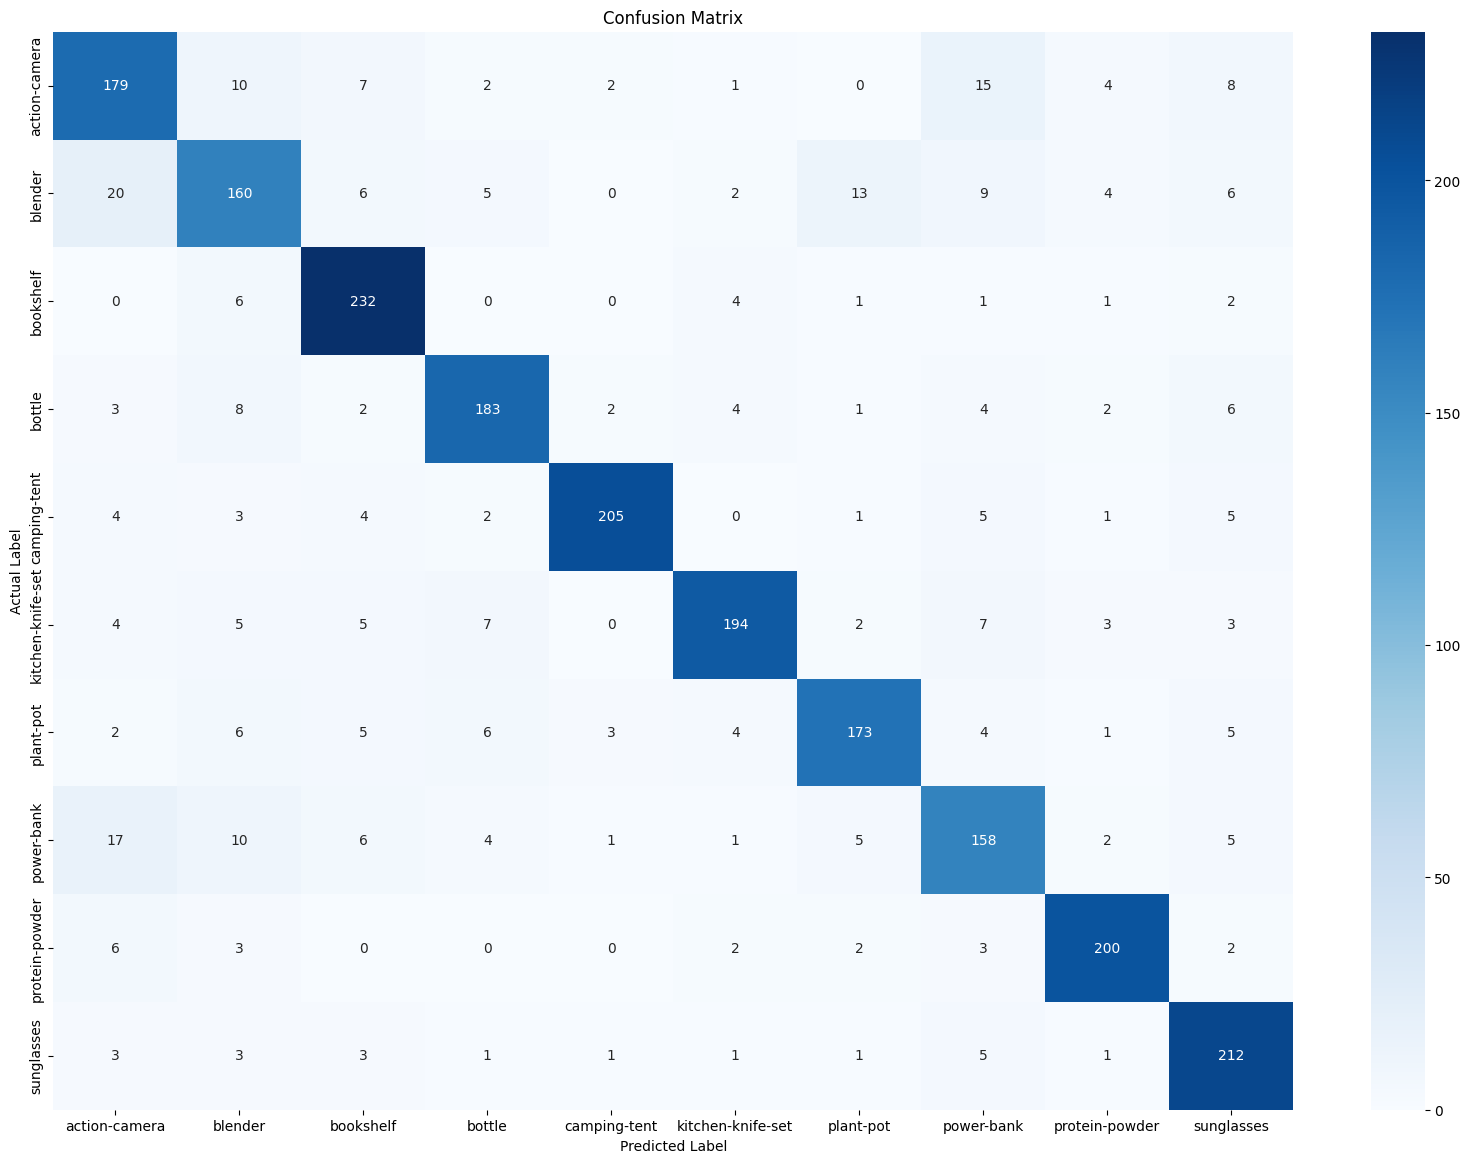

In [ ]:
class_names = dataset.classes
cm_se, precision_se, recall_se, f1_se, accuracy_se = evaluate_model(model2, device, test_loader)
plot_confusion_matrix(cm_se, class_names)


In [ ]:
print(f"Precision: {precision_se:.4f}, Recall: {recall_se:.4f}, F1 Score: {f1_se:.4f}, Accuracy:{accuracy_se*100}")

Precision: 0.8471, Recall: 0.8457, F1 Score: 0.8456, Accuracy:84.56735057983943


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerBlock(nn.Module):
    def __init__(self, feature_size, num_layers, nhead):
        super(TransformerBlock, self).__init__()
        self.encoder_layer = TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dim_feedforward=feature_size * 4, dropout=0.1)
        self.transformer_encoder = TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.pos_encoder = PositionalEncoding(feature_size, dropout=0.1)

    def forward(self, src):
        src = src.flatten(2).permute(2, 0, 1)  # Reshape and permute to (seq_len, batch, feature)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = output.permute(1, 2, 0).view(src.size(1), src.size(2), int(output.size(0)**0.5), int(output.size(0)**0.5))
        return output

class ResNet_Transformer(nn.Module):
    def __init__(self, block, layers, num_classes=1000, include_transformer=True):
        super(ResNet_Transformer, self).__init__()
        self.include_transformer = include_transformer
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        if self.include_transformer:
            self.transformer_block = TransformerBlock(feature_size=256, num_layers=2, nhead=8)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        if self.include_transformer:
            x = self.transformer_block(x)

        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

def resnet18_transformer(num_classes):
    model = ResNet_Transformer(ResidualBlock, [2, 2, 2, 2], num_classes=num_classes, include_transformer=True)
    return model

# Example instantiation:
model_3 = resnet18_transformer(num_classes=len(dataset.classes))


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
print(model_3)

ResNet_Transformer(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReL

In [ ]:
train_losses_rtf, train_accuracies_rtf, validation_losses_rtf, validation_accuracies_rtf = train_model(model_3, train_loader, val_loader, device, EPOCH_COUNT=150, wd=1e-4)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/150], Training Loss: 2.2647, Training Accuracy: 24.02%, Validation Loss: 2.7798, Validation Accuracy: 19.81%
Epoch [2/150], Training Loss: 1.6309, Training Accuracy: 44.54%, Validation Loss: 1.9289, Validation Accuracy: 36.41%
Epoch [3/150], Training Loss: 1.3477, Training Accuracy: 54.68%, Validation Loss: 1.5582, Validation Accuracy: 50.02%
Epoch [4/150], Training Loss: 1.1811, Training Accuracy: 60.55%, Validation Loss: 1.6632, Validation Accuracy: 50.29%
Epoch [5/150], Training Loss: 1.0113, Training Accuracy: 66.19%, Validation Loss: 1.4286, Validation Accuracy: 55.02%
Epoch [6/150], Training Loss: 0.8633, Training Accuracy: 71.30%, Validation Loss: 1.1101, Validation Accuracy: 64.84%
Epoch [7/150], Training Loss: 0.7744, Training Accuracy: 74.22%, Validation Loss: 0.9849, Validation Accuracy: 68.76%
Epoch [8/150], Training Loss: 0.7099, Training Accuracy: 76.73%, Validation Loss: 0.9474, Validation Accuracy: 70.68%
Epoch [9/150], Training Loss: 0.6197, Training Accuracy:

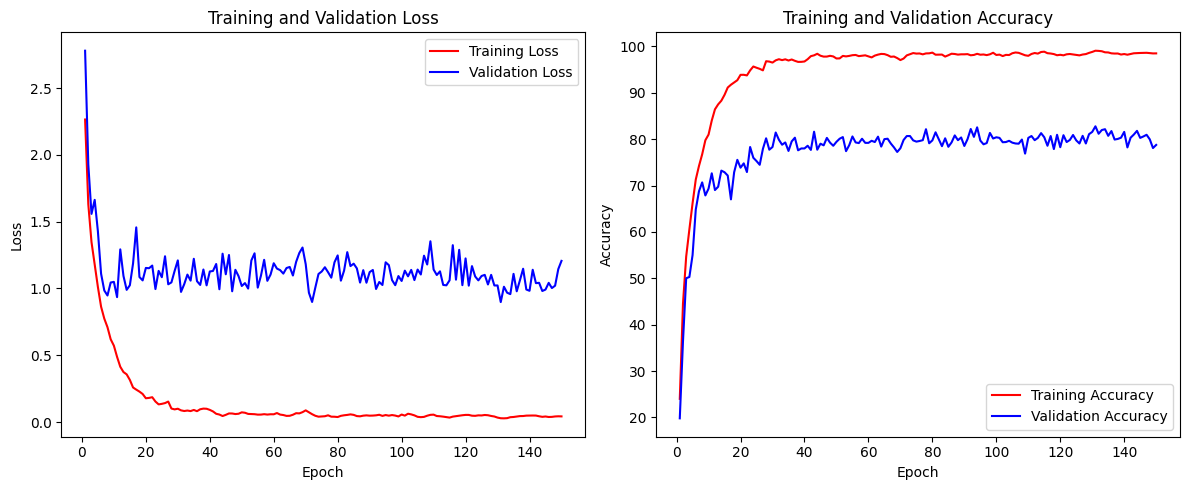

In [ ]:
plot_metrics(train_losses_rtf, train_accuracies_rtf, validation_losses_rtf, validation_accuracies_rtf)

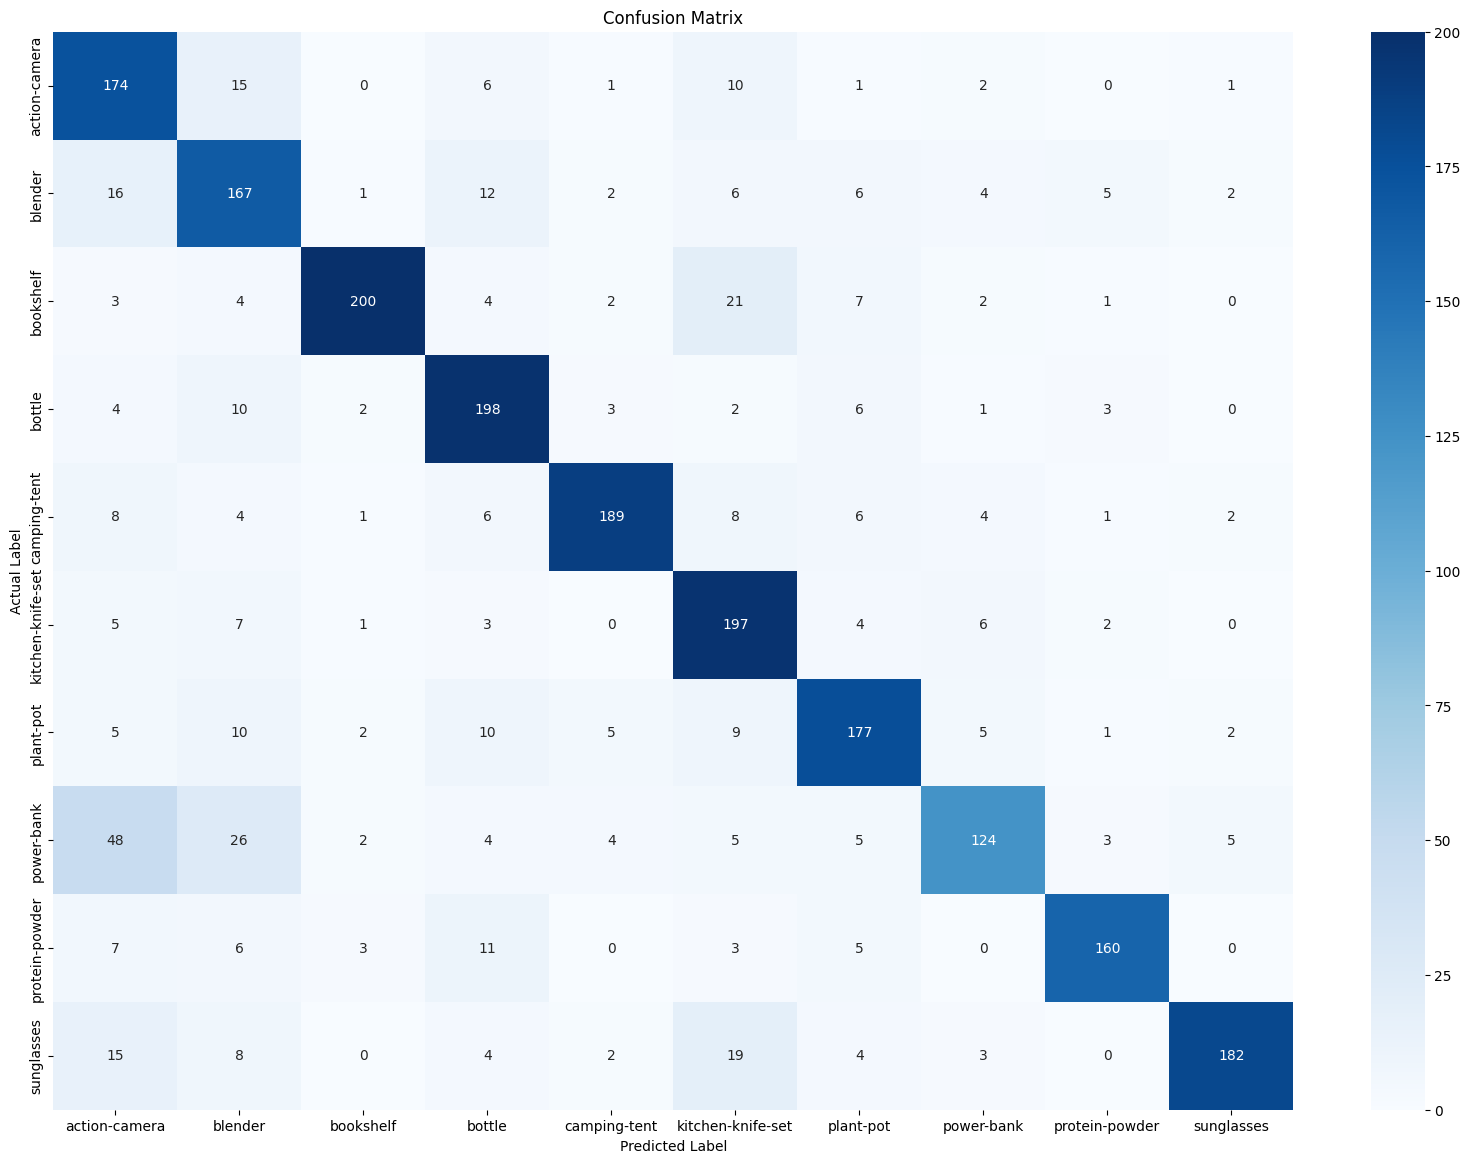

In [ ]:
class_names = dataset.classes
cm_rtf, precision_rtf, recall_rtf, f1_rtf, accuracy_rtf = evaluate_model(model_3, device, test_loader)
plot_confusion_matrix(cm_rtf, class_names)

In [ ]:
print(f"Precision: {precision_rtf:.4f}, Recall: {recall_rtf:.4f}, F1 Score: {f1_rtf:.4f}, Accuracy:{accuracy_rtf*100}")

Precision: 0.8075, Recall: 0.7886, F1 Score: 0.7903, Accuracy:78.85816235504014


In [ ]:
def senet18_transformer(num_classes):
    model = ResNet_Transformer(ResidualBlock_SE, [2, 2, 2, 2], num_classes=num_classes, include_transformer=True)
    return model

In [ ]:
model_4 = senet18_transformer(num_classes=len(dataset.classes))
print(model_4)

ResNet_Transformer(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock_SE(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (se): SEBlock(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=False)
          (1): ReLU(inplace=True)
          (2): Linear(in_featu

In [ ]:
train_losses_stf, train_accuracies_stf, validation_losses_stf, validation_accuracies_stf = train_model(model_4, train_loader, val_loader, device, EPOCH_COUNT=150, wd=1e-4)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/150], Training Loss: 1.8877, Training Accuracy: 34.01%, Validation Loss: 2.6205, Validation Accuracy: 26.02%
Epoch [2/150], Training Loss: 1.3547, Training Accuracy: 54.65%, Validation Loss: 2.1985, Validation Accuracy: 37.48%
Epoch [3/150], Training Loss: 1.0531, Training Accuracy: 65.41%, Validation Loss: 1.5643, Validation Accuracy: 53.46%
Epoch [4/150], Training Loss: 0.8806, Training Accuracy: 71.19%, Validation Loss: 1.0856, Validation Accuracy: 64.84%
Epoch [5/150], Training Loss: 0.7236, Training Accuracy: 76.43%, Validation Loss: 0.9058, Validation Accuracy: 70.59%
Epoch [6/150], Training Loss: 0.6192, Training Accuracy: 79.47%, Validation Loss: 1.3837, Validation Accuracy: 62.38%
Epoch [7/150], Training Loss: 0.5371, Training Accuracy: 82.61%, Validation Loss: 1.0281, Validation Accuracy: 67.11%
Epoch [8/150], Training Loss: 0.4718, Training Accuracy: 84.73%, Validation Loss: 0.9262, Validation Accuracy: 72.47%
Epoch [9/150], Training Loss: 0.4063, Training Accuracy:

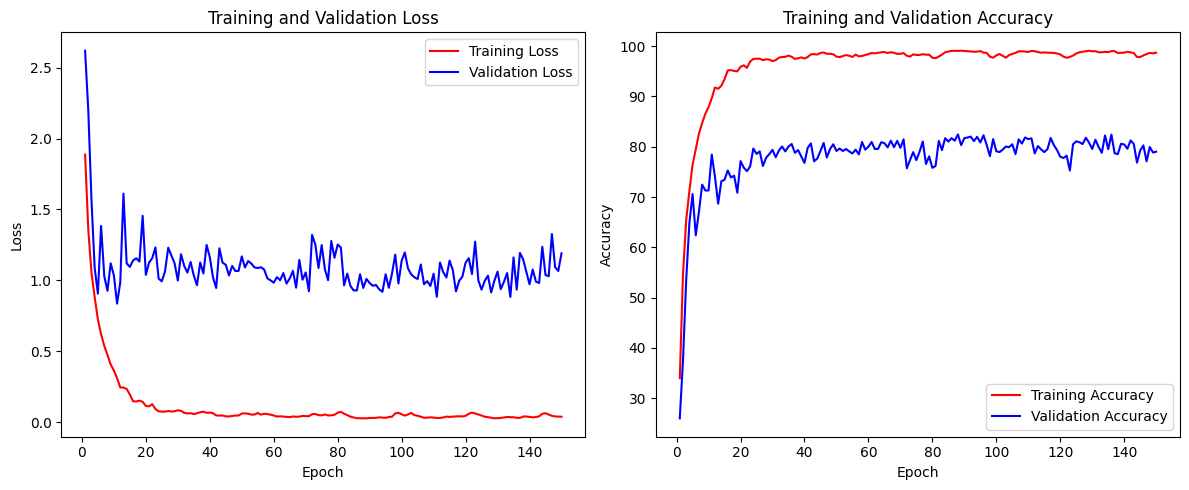

In [ ]:
plot_metrics(train_losses_stf, train_accuracies_stf, validation_losses_stf, validation_accuracies_stf)

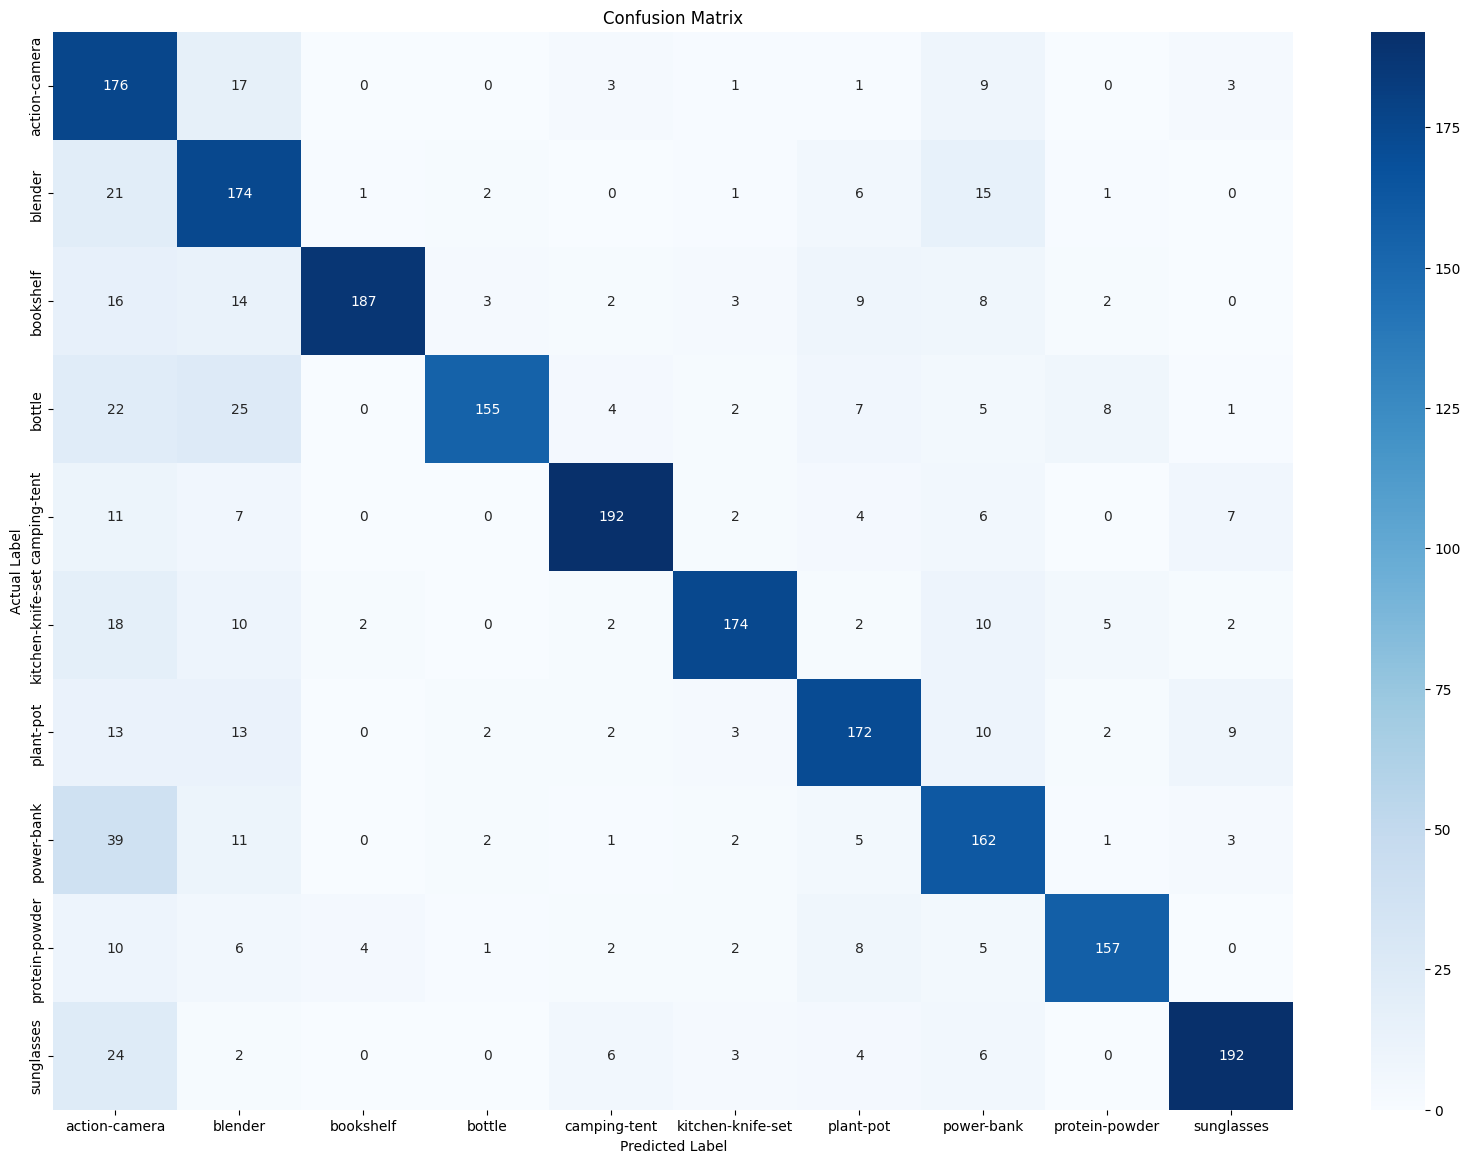

In [ ]:
class_names = dataset.classes
cm_stf, precision_stf, recall_stf, f1_stf, accuracy_stf = evaluate_model(model_4, device, test_loader)
plot_confusion_matrix(cm_stf, class_names)

In [ ]:
print(f"Precision: {precision_stf:.4f}, Recall: {recall_stf:.4f}, F1 Score: {f1_stf:.4f}, Accuracy:{accuracy_stf*100}")

Precision: 0.8114, Recall: 0.7765, F1 Score: 0.7847, Accuracy:77.65388046387154


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerBlock(nn.Module):
    def __init__(self, feature_size, num_layers, nhead):
        super(TransformerBlock, self).__init__()
        self.encoder_layer = TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dim_feedforward=feature_size * 4, dropout=0.1)
        self.transformer_encoder = TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.pos_encoder = PositionalEncoding(feature_size, dropout=0.1)

    def forward(self, src):
        src = src.flatten(2).permute(2, 0, 1)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = output.permute(1, 2, 0).view(src.size(1), src.size(2), int(output.size(0)**0.5), int(output.size(0)**0.5))
        return output

class ResNet_Transformer_Deep(nn.Module):
    def __init__(self, block, layers, num_classes=1000, include_transformer=True):
        super(ResNet_Transformer_Deep, self).__init__()
        self.include_transformer = include_transformer
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        if self.include_transformer:
            self.transformer_block = TransformerBlock(feature_size=256, num_layers=6, nhead=8)  # More layers
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        if self.include_transformer:
            x = self.transformer_block(x)

        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

def resnet_deep_transformer(num_classes):
    model = ResNet_Transformer_Deep(ResidualBlock, [3, 4, 6, 3], num_classes=num_classes, include_transformer=True)
    return model
model_deeper = resnet_deep_transformer(num_classes=len(dataset.classes))


In [ ]:
train_losses_drtf, train_accuracies_drtf, validation_losses_drtf, validation_accuracies_drtf = train_model(model_deeper, train_loader, val_loader, device, EPOCH_COUNT=150, wd=1e-4)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/150], Training Loss: 2.5146, Training Accuracy: 13.97%, Validation Loss: 12.1048, Validation Accuracy: 9.28%
Epoch [2/150], Training Loss: 2.1259, Training Accuracy: 24.13%, Validation Loss: 5.5097, Validation Accuracy: 12.58%
Epoch [3/150], Training Loss: 2.0250, Training Accuracy: 27.69%, Validation Loss: 2.7782, Validation Accuracy: 19.28%
Epoch [4/150], Training Loss: 1.8903, Training Accuracy: 33.48%, Validation Loss: 2.7283, Validation Accuracy: 16.11%
Epoch [5/150], Training Loss: 1.8022, Training Accuracy: 36.36%, Validation Loss: 3.1790, Validation Accuracy: 17.14%
Epoch [6/150], Training Loss: 1.7488, Training Accuracy: 38.99%, Validation Loss: 1.8817, Validation Accuracy: 34.18%
Epoch [7/150], Training Loss: 1.6659, Training Accuracy: 42.98%, Validation Loss: 2.3728, Validation Accuracy: 23.43%
Epoch [8/150], Training Loss: 1.6444, Training Accuracy: 43.17%, Validation Loss: 2.8921, Validation Accuracy: 23.34%
Epoch [9/150], Training Loss: 1.5914, Training Accuracy:

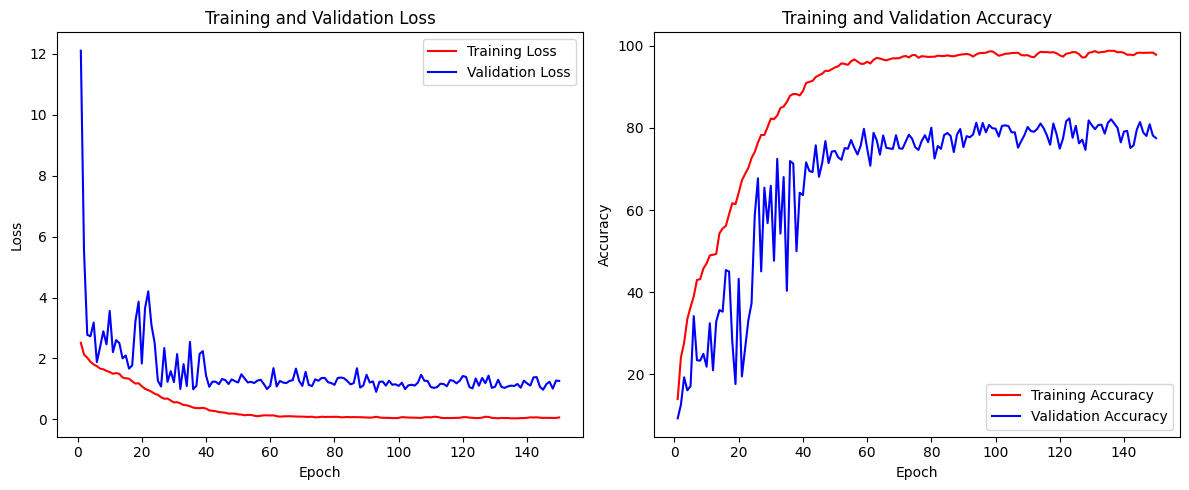

In [ ]:
plot_metrics(train_losses_drtf, train_accuracies_drtf, validation_losses_drtf, validation_accuracies_drtf)

In [ ]:
class_names = dataset.classes
cm_drtf, precision_drtf, recall_drtf, f1_drtf, accuracy_drtf = evaluate_model(model_deeper, device, test_loader)

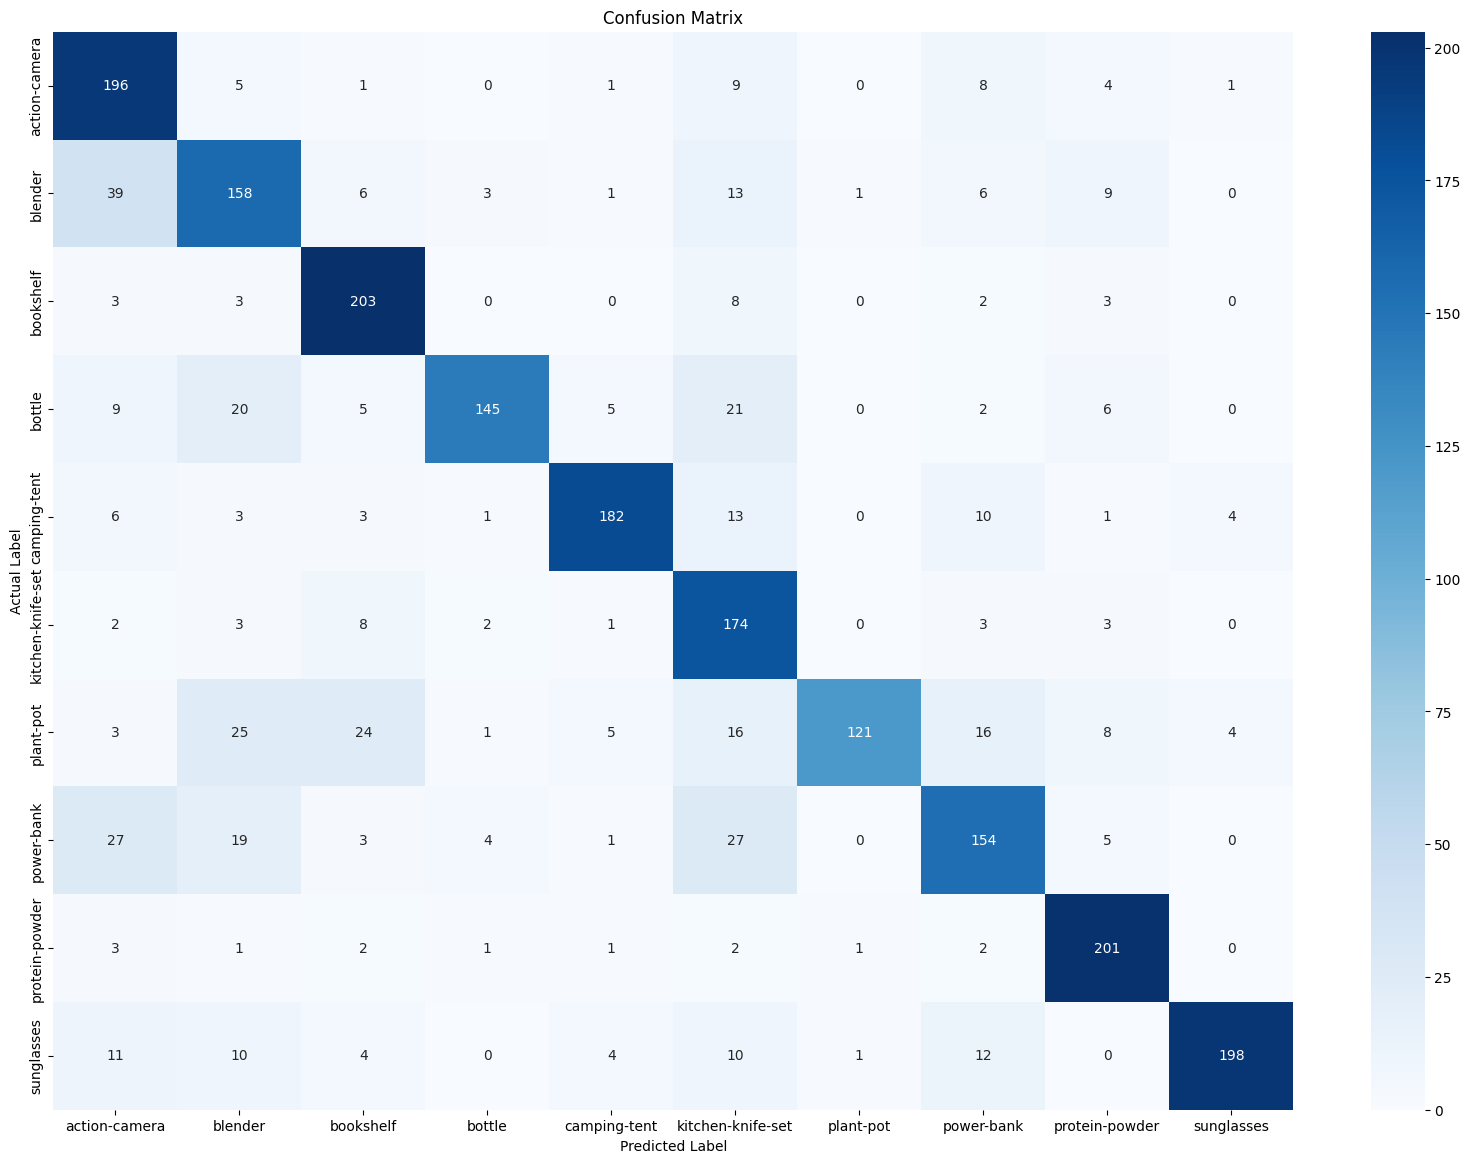

Precision: 0.8008, Recall: 0.7725, F1 Score: 0.7726, Accuracy:77.25245316681534


In [ ]:
plot_confusion_matrix(cm_drtf, class_names)
print(f"Precision: {precision_drtf:.4f}, Recall: {recall_drtf:.4f}, F1 Score: {f1_drtf:.4f}, Accuracy:{accuracy_drtf*100}")

In [ ]:
def resnet50_drop(num_classes):
    model = ResNet_D(ResidualBlock, [3, 4, 6, 3], num_classes=num_classes)
    return model

In [ ]:
deep_resnet = resnet50_drop(num_classes=10)

In [ ]:
train_losses_dr, train_accuracies_dr, validation_losses_dr, validation_accuracies_dr = train_model(deep_resnet, train_loader, val_loader, device, EPOCH_COUNT=150, wd=1e-4)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/150], Training Loss: 2.2641, Training Accuracy: 24.59%, Validation Loss: 21.7431, Validation Accuracy: 12.63%
Epoch [2/150], Training Loss: 1.8486, Training Accuracy: 36.94%, Validation Loss: 2.1601, Validation Accuracy: 32.08%
Epoch [3/150], Training Loss: 1.6646, Training Accuracy: 43.61%, Validation Loss: 1.7685, Validation Accuracy: 42.21%
Epoch [4/150], Training Loss: 1.5104, Training Accuracy: 50.22%, Validation Loss: 1.7473, Validation Accuracy: 43.55%
Epoch [5/150], Training Loss: 1.3667, Training Accuracy: 54.32%, Validation Loss: 1.7903, Validation Accuracy: 43.15%
Epoch [6/150], Training Loss: 1.2548, Training Accuracy: 58.61%, Validation Loss: 1.8816, Validation Accuracy: 43.82%
Epoch [7/150], Training Loss: 1.1004, Training Accuracy: 64.68%, Validation Loss: 1.3498, Validation Accuracy: 59.97%
Epoch [8/150], Training Loss: 0.9823, Training Accuracy: 68.19%, Validation Loss: 1.4183, Validation Accuracy: 57.21%
Epoch [9/150], Training Loss: 0.9219, Training Accuracy

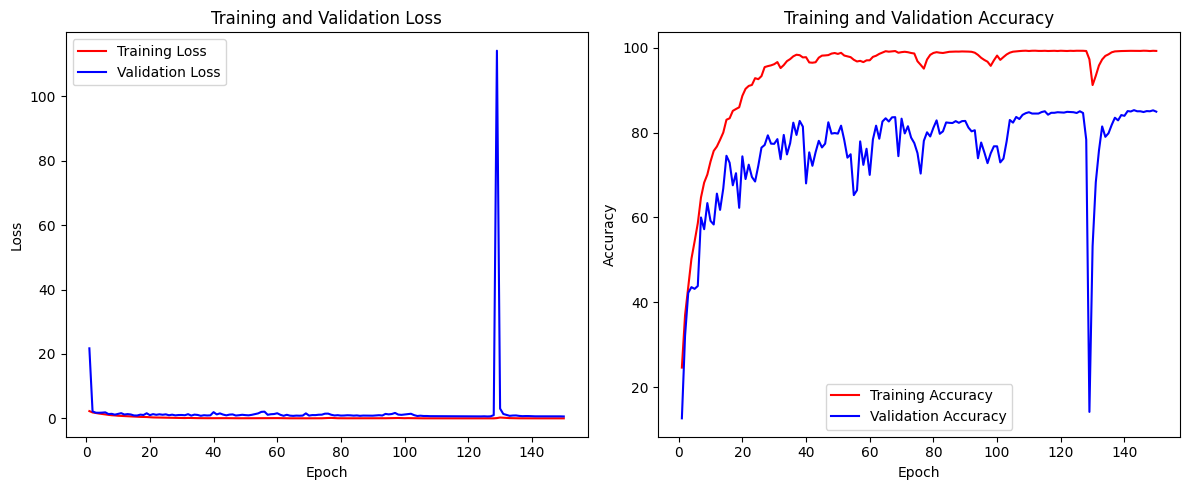

In [ ]:
plot_metrics(train_losses_dr, train_accuracies_dr, validation_losses_dr, validation_accuracies_dr)

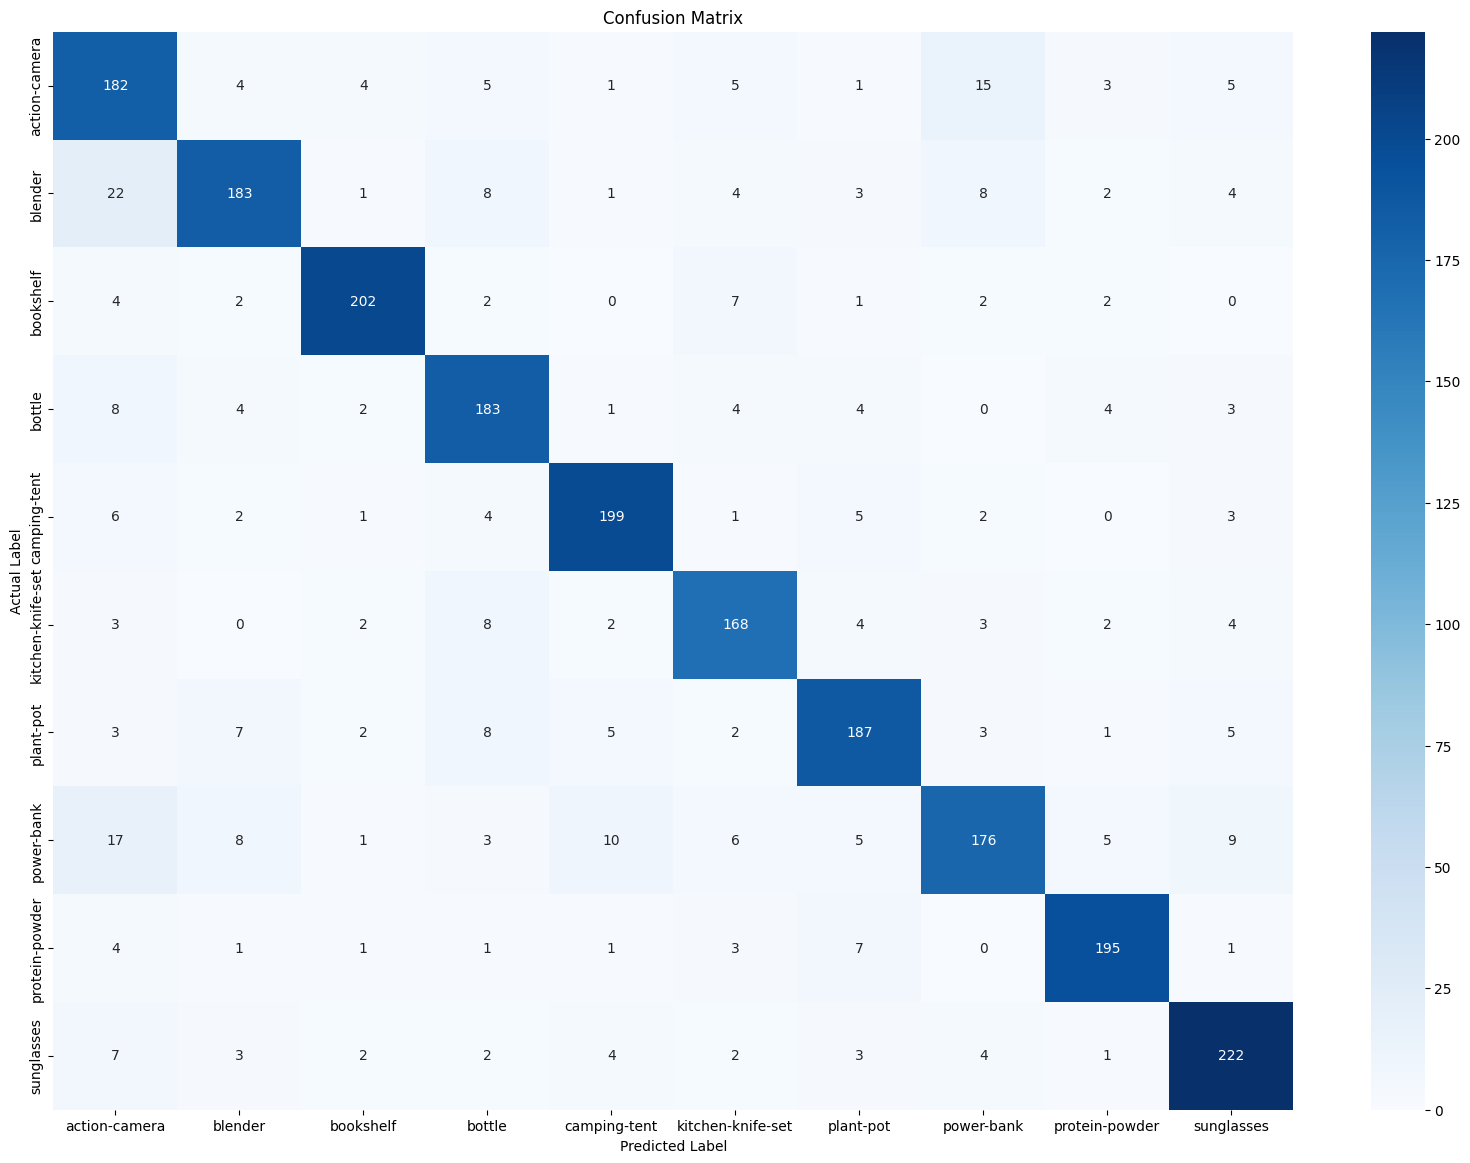

In [ ]:
class_names = dataset.classes
cm_dr, precision_dr, recall_dr, f1_dr, accuracy_dr = evaluate_model(deep_resnet, device, test_loader)
plot_confusion_matrix(cm_dr, class_names)

In [ ]:
print(f"Precision: {precision_dr:.4f}, Recall: {recall_dr:.4f}, F1 Score: {f1_dr:.4f}, Accuracy:{accuracy_dr*100}")

Precision: 0.8481, Recall: 0.8461, F1 Score: 0.8462, Accuracy:84.61195361284567


In [ ]:
torch.save(model_deeper.state_dict(), 'Res50Transformer.pth')
torch.save(deep_resnet.state_dict(), 'Res50.pth')

In [ ]:
!mv 'Res50.pth' '/content/drive/MyDrive/DL_Project'
!mv 'Res50Transformer.pth' '/content/drive/MyDrive/DL_Project'